# **Robust Scaling**
## **Scaling to quantiles and median**

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove 2 variables:
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

In [4]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# the scaler stores the median values of the features as learned from train set
scaler.center_

array([3.53910000e+00, 2.90000000e+01, 5.22931763e+00, 1.04878049e+00,
       1.16500000e+03, 2.81635506e+00])

In [6]:
# the scaler stores the IQR values of the features as learned from train set
scaler.scale_

array([2.16550000e+00, 1.90000000e+01, 1.59537022e+00, 9.41284380e-02,
       9.40000000e+02, 8.53176853e-01])

In [7]:
# let's transform the returned NumPy arrays to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [8]:
# Inspect the original value statistics
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,3.880013,28.687984,5.442057,1.101109,1426.222061,3.140976
std,1.920007,12.560416,2.862733,0.519956,1091.567168,15.796292
min,0.499900,1.000000,1.465753,0.500000,8.000000,0.692308
25%,2.552150,18.000000,4.414452,1.006494,796.000000,2.436452
50%,3.529600,29.000000,5.227365,1.048741,1169.500000,2.825041
75%,4.768750,37.000000,6.064257,1.098434,1727.250000,3.285501
max,15.000100,52.000000,141.909091,25.636364,16305.000000,1243.333333


In [9]:
# inspect the values after scaling
X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.157429,-0.016422,0.133348,0.555929,0.277896,0.380485
std,0.886634,0.661075,1.794400,5.523897,1.161242,18.514675
min,-1.403463,-1.473684,-2.359054,-5.830124,-1.230851,-2.489575
25%,-0.455761,-0.578947,-0.510769,-0.449248,-0.392553,-0.445280
50%,-0.004387,0.000000,-0.001224,-0.000421,0.004787,0.010181
75%,0.567837,0.421053,0.523352,0.527508,0.598138,0.549881
max,5.292542,1.210526,85.672762,261.213122,16.106383,1453.997462


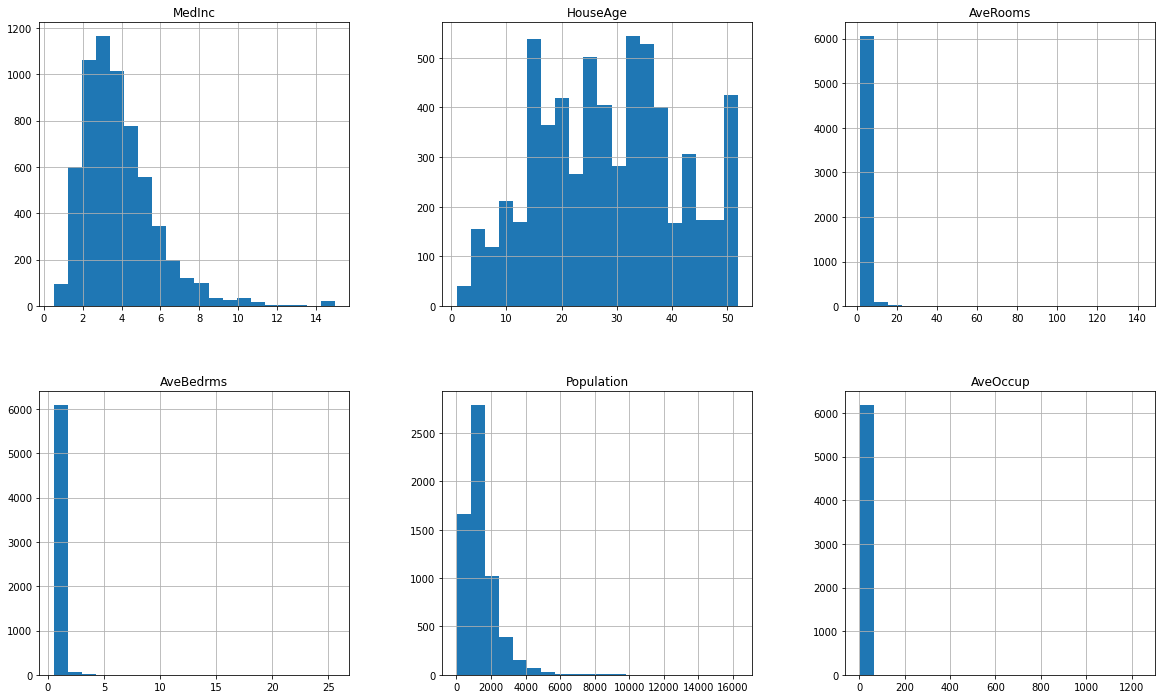

In [10]:
X_test.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

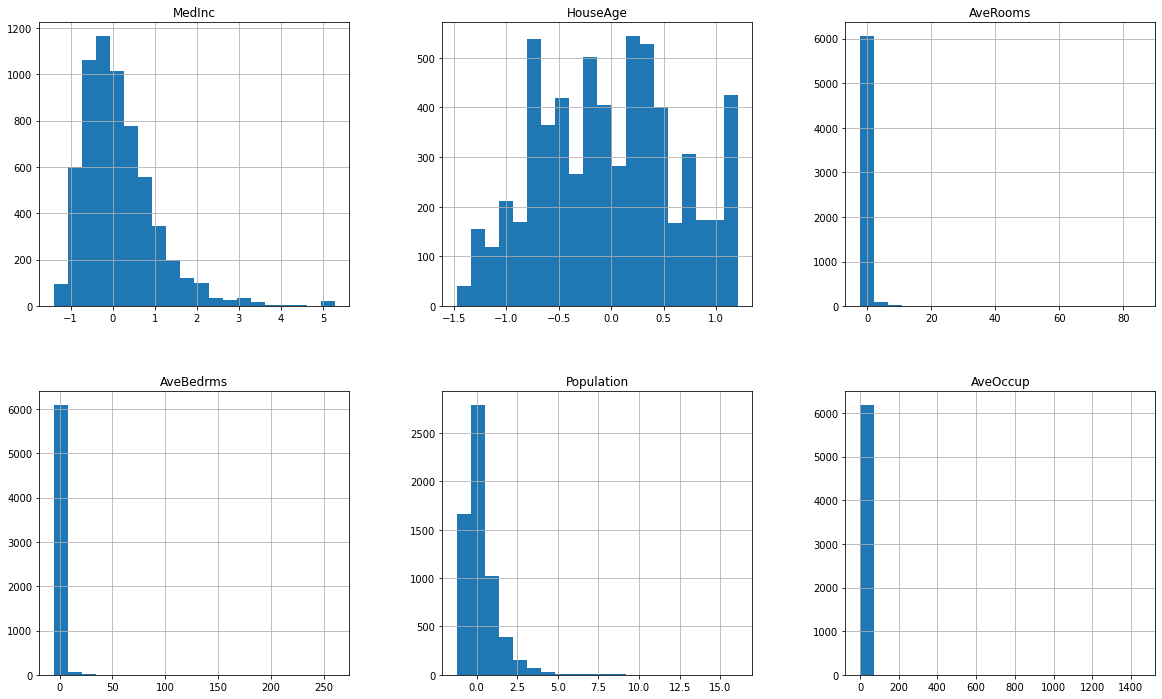

In [11]:
X_test_scaled.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()